In [37]:
import math as mt
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import model_selection

In [38]:
control=pd.read_csv("/home/arjun/Downloads/control_data.csv")
experiment=pd.read_csv("/home/arjun/Downloads/experiment_data.csv")


In [39]:
control.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0


In [40]:
control.dropna(inplace=True)
print(control.index)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22],
           dtype='int64')


In [41]:
print(control.shape)

(23, 5)


In [42]:
experiment.dropna(inplace=True)

In [43]:
print(experiment.shape)

(23, 5)


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
from sklearn import linear_model 

In [46]:
lin_reg = linear_model.LinearRegression()

In [47]:
control["row_id"]=control.index
control.head()

,Date,Pageviews,Clicks,Enrollments,Payments,row_id
0,"Sat, Oct 11",7723,687,134.0,70.0,0
1,"Sun, Oct 12",9102,779,147.0,70.0,1
2,"Mon, Oct 13",10511,909,167.0,95.0,2
3,"Tue, Oct 14",9871,836,156.0,105.0,3
4,"Wed, Oct 15",10014,837,163.0,64.0,4


In [48]:
X = control["row_id"].values.reshape(-1,1)

In [49]:
y = control["Enrollments"].values.reshape(-1,1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [52]:
lin_reg.intercept_

array([146.78356044])

In [53]:
lin_reg.coef_

array([[2.18567033]])

In [54]:
pred = lin_reg.predict(X_test)
print(pred)

[[179.56861538]
 [166.45459341]
 [146.78356044]
 [164.26892308]
 [183.93995604]
 [173.0116044 ]
 [148.96923077]]


Text(0.5, 1.0, 'prediction')

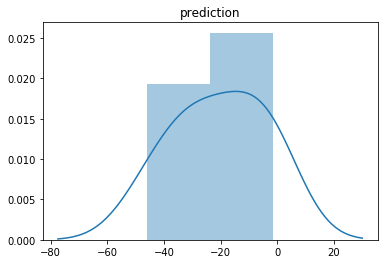

In [55]:
sns.distplot((y_test-pred))
plt.title('prediction')

In [63]:
#mean squared error
seed=7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(lin_reg, X, y, cv=kfold, scoring=scoring)
print(results.mean(), results.std())

-797.2869949434099 566.5515166328046


In [65]:
#mean absolute error
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(lin_reg, X, y, cv=kfold, scoring=scoring)
print(results.mean(), results.std())

-22.735622734885617 7.73857771735955


In [67]:
#r^2 error
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
scoring = 'r2'
results = model_selection.cross_val_score(lin_reg, X, y, cv=kfold, scoring=scoring)
print(results.mean(), results.std())

-3.216856002705697 5.871196820254716
